# k-Nearest Neighbors (kNN)

Author: Athan Zhang

*In this notebook:*
- kNN Class
- Initiatlizing and Training the Model
- Testing the Model
- Finding Ideak k
- Dataset Handling
- Sklean Implementation

The k-Nearest Neighbors classifier is a **supervised** machine learning model. It works for both data classificiation and regression. It estimates the the class of a datapoint based on it's proximity, or closeness, to nearby datapoints. The most common way to calculate the distance between data points is with the Euclidean distance, given as follows:

$$
D(p,q) = \sqrt{\sum_{i=1}^{n} \left(q_{i} - p_{i}\right)^{2}}
$$

However there are other distance metrics, such as the Manhattan Distance, Minkowski Distance, and Hamming Distance. 

During training time, it doesn't make any calculations, rather, it just stores information. When testing, a data point is compared to its k nearest neighbors stored from training, where k is any arbitrary number set. For classification, the mode label of these neighbors is returned. For regression, the mean is returned. 

Let's dive into the algorithm.

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

## kNN Class

Below is the annotated code for the kNN class.

In [2]:
class kNN():
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        """
        Stores the initial training data and labels.
        """
        self.data = X
        self.labels = y
        
    def distance(self, X):  
        """
        Calculates the Euclidean distance between the
        stored training data and input data.
        """
        n_samples, n_attributes = X.shape
        dists = [np.sqrt(np.sum(((self.data - X[i])**2).astype(float), axis=1)) for i in range(n_samples)]
        
        return np.array(dists)
    
    def predict(self, X, k=5):
        """
        Predicts the classification labels for input data.
        """
        dists = self.distance(X)
        
        neighbors = np.argsort(dists)[:, :k]
        neighbor_labels = self.labels[neighbors]
        preds = np.max(neighbor_labels, axis=1)

        return preds

## Initializing and Training the Model

In [3]:
# Load and split data
data = load_iris()
X = data.data
Y = data.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1000)

# Instantiate Classifier
clf = kNN()
clf.fit(X_train,Y_train)

## Testing the Model

In [4]:
preds = clf.predict(X_test)

# Calculate Accuracy
acc = np.sum(preds==Y_test) / len(Y_test)
print(f"Testing Accuracy:{acc: .3f}")

# Calculate Macro & Micro average Precision & Recall
tps, fps, fns = [], [], []
for label in np.unique(Y):
    tps.append(np.sum( (Y_test==label) & (preds==label) ))
    fps.append(np.sum( (Y_test!=label) & (preds==label) ))
    fns.append(np.sum( (Y_test==label) & (preds!=label) ))

macro_precision  = np.mean(tps / np.add(tps,fps))
macro_recall     = np.mean(tps / np.add(tps,fns))
micro_precision  = np.sum(tps) / (np.sum(tps) + np.sum(fps))
micro_recall     = np.sum(tps) / (np.sum(tps) + np.sum(fns))

print(f"Macro-Precision: {macro_precision: .3f}")
print(f"Macro-Recall:\t {macro_recall: .3f}")
print(f"Micro-Precision: {micro_precision: .3f}")
print(f"Micro-Recall:\t {micro_recall: .3f}")

Testing Accuracy: 0.933
Macro-Precision:  0.939
Macro-Recall:	  0.944
Micro-Precision:  0.933
Micro-Recall:	  0.933


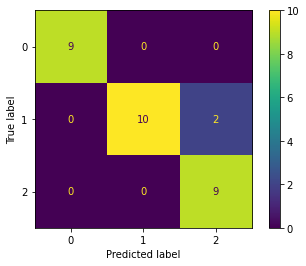

In [5]:
# Show Confusion Matrix
cm = confusion_matrix(Y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(Y))
disp.plot()

## Finding Ideal k

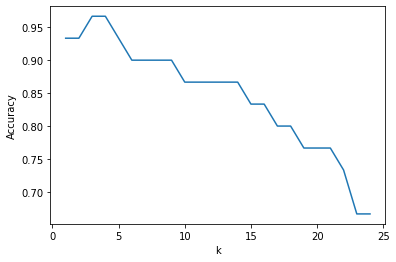

In [6]:
# Plot how accuracy changes with k
ks = [*range(1,25)]
accs = []
for k in ks:
    preds = clf.predict(X_test, k=k)
    acc = np.sum(preds==Y_test) / len(Y_test)
    accs.append(acc)

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(ks, accs) 


This shows that the ideal k does not follow a linear relationship. Starting from k=0, accuracy increases as k increases. This is due to improved accuracy with majority voting. However, past a critical point (in this case k=3), the accuracy begins to decrease.

## Dataset Handling
Let's test the kNN algorithm against an artificially made dataset that could have outliers or be skewed. 


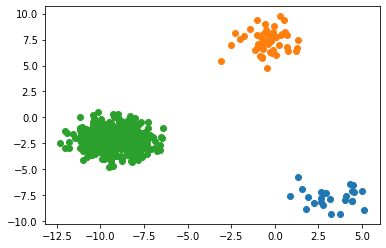

In [26]:
# Make artificial dataset
X, Y = make_blobs(n_samples=[25,50,500], n_features=3, random_state=1000)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1000)

for label in np.unique(Y):
    plt.scatter(X[Y==label,0],X[Y==label,1])

In [16]:
clf = kNN()
clf.fit(X_train,Y_train)
preds = clf.predict(X_test)
acc = np.sum(preds==Y_test) / len(Y_test)
print(f"Testing Accuracy:{acc: .3f}")

Testing Accuracy: 1.000


Unsurprisingly, the more skewed a dataset becomes, the better kNN performs. This is because the neighbors are more closely related to each other due to the skewedness.

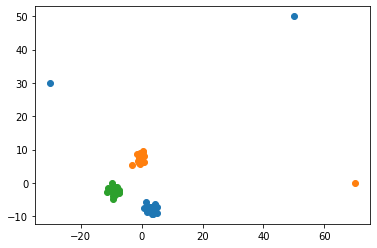

In [27]:
# Add outliers
X, Y = make_blobs(n_samples=[25,25,25], n_features=3, random_state=1000)
X = np.append(X, [[-30,30,30],[50,50,0],[70,0,0]], axis=0)
Y = np.append(Y, [0,0,1], axis=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1000)

for label in np.unique(Y):
    plt.scatter(X[Y==label,0],X[Y==label,1])